In [18]:
cd path\to\Satellite-Imagery-Property-Valuation


[WinError 3] The system cannot find the path specified: 'path\\to\\Satellite-Imagery-Property-Valuation'
c:\Users\Chhavikash Raj\Satellite-Imagery-Property-Valuation


In [19]:
import pandas as pd

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

print("TRAIN SHAPE:", train.shape)
print("TEST SHAPE:", test.shape)

print("\nTRAIN COLUMNS:")
print(train.columns.tolist())

print("\nTEST COLUMNS:")
print(test.columns.tolist())

print("\nCHECKS:")
print("price in train:", "price" in train.columns)
print("price in test:", "price" in test.columns)
print("id in train:", "id" in train.columns)
print("id in test:", "id" in test.columns)


TRAIN SHAPE: (16209, 21)
TEST SHAPE: (5404, 20)

TRAIN COLUMNS:
['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

TEST COLUMNS:
['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

CHECKS:
price in train: True
price in test: False
id in train: True
id in test: True


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


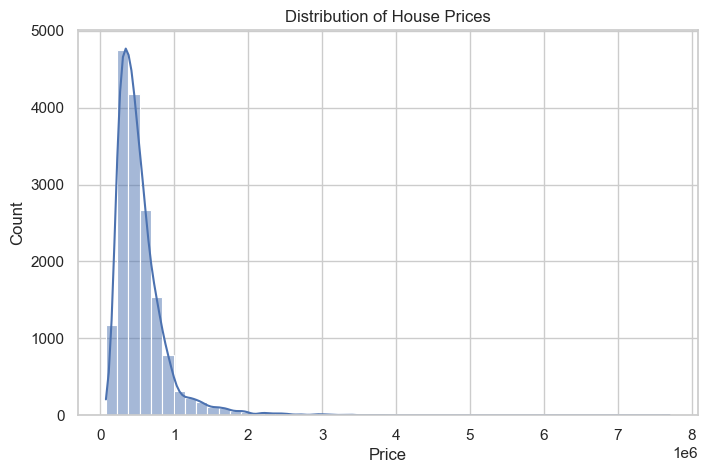

In [21]:
plt.figure()
sns.histplot(train["price"], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


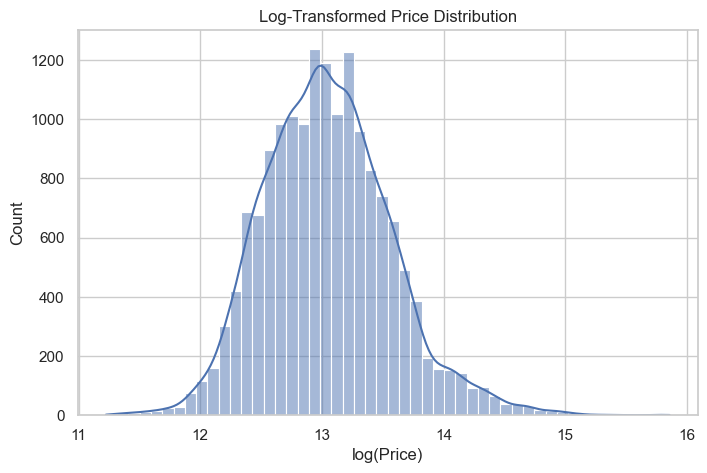

In [22]:
plt.figure()
sns.histplot(np.log1p(train["price"]), bins=50, kde=True)
plt.title("Log-Transformed Price Distribution")
plt.xlabel("log(Price)")
plt.ylabel("Count")
plt.show()


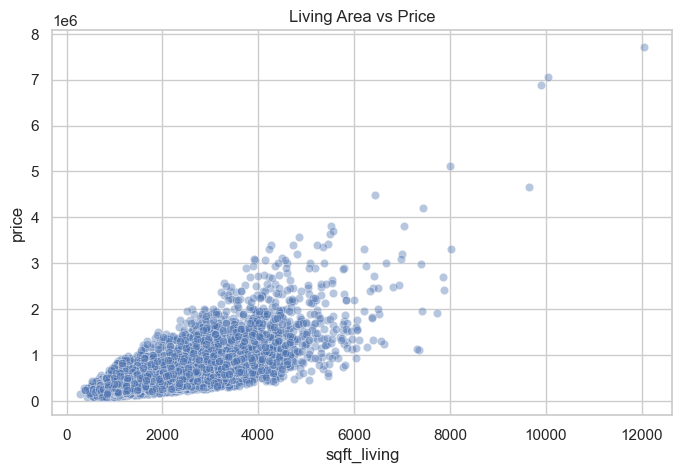

In [23]:
plt.figure()
sns.scatterplot(
    x=train["sqft_living"],
    y=train["price"],
    alpha=0.4
)
plt.title("Living Area vs Price")
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.show()


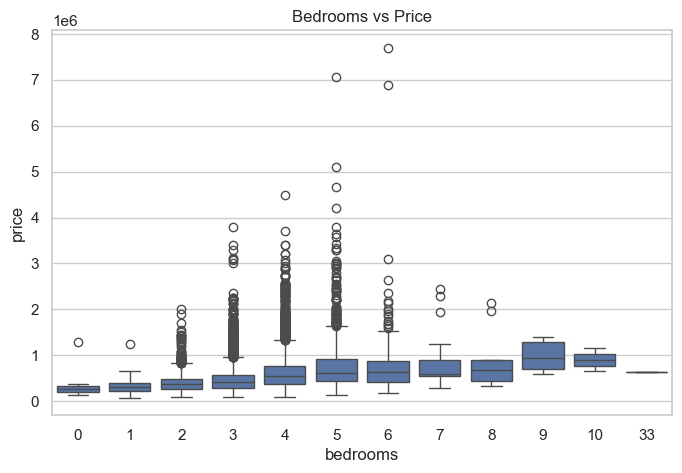

In [24]:
plt.figure()
sns.boxplot(x=train["bedrooms"], y=train["price"])
plt.title("Bedrooms vs Price")
plt.show()


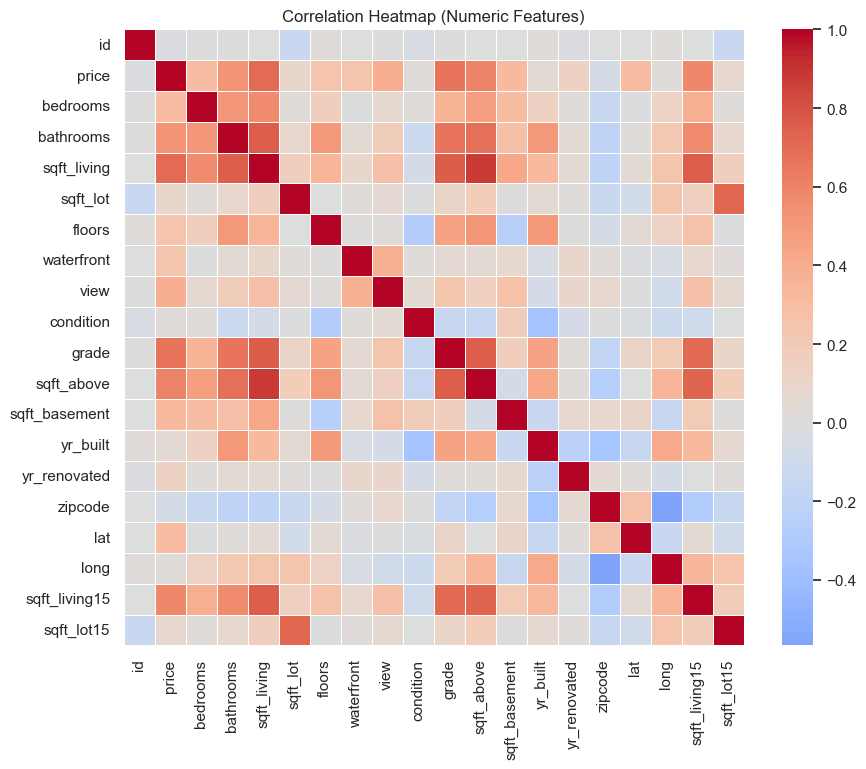

In [25]:
numeric_cols = train.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
sns.heatmap(
    numeric_cols.corr(),
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


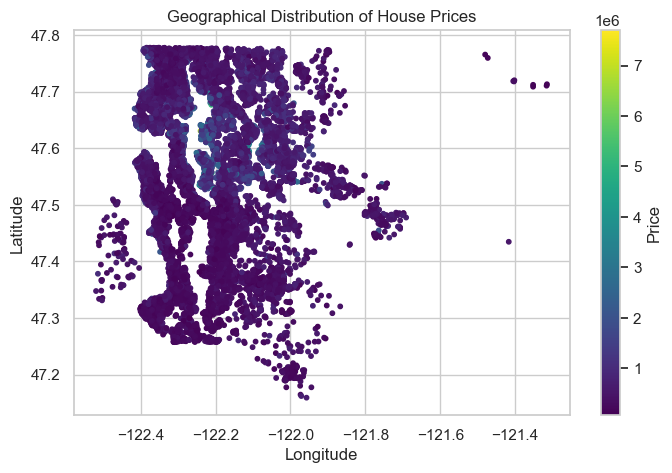

In [26]:
plt.figure()
plt.scatter(
    train["long"],
    train["lat"],
    c=train["price"],
    cmap="viridis",
    s=10
)
plt.colorbar(label="Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Distribution of House Prices")
plt.show()


In [27]:
train_clean = train.copy()
test_clean = test.copy()


In [28]:
train_clean.isnull().sum().sort_values(ascending=False)


id               0
grade            0
sqft_living15    0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
condition        0
date             0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
bedrooms         0
price            0
sqft_lot15       0
dtype: int64

In [29]:
for col in train_clean.columns:
    if train_clean[col].dtype != "object":
        train_clean[col].fillna(train_clean[col].median(), inplace=True)
    else:
        train_clean[col].fillna(train_clean[col].mode()[0], inplace=True)

for col in test_clean.columns:
    if test_clean[col].dtype != "object":
        test_clean[col].fillna(test_clean[col].median(), inplace=True)
    else:
        test_clean[col].fillna(test_clean[col].mode()[0], inplace=True)


C:\Users\Chhavikash Raj\AppData\Local\Temp\ipykernel_4340\869953405.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_clean[col].fillna(train_clean[col].median(), inplace=True)
C:\Users\Chhavikash Raj\AppData\Local\Temp\ipykernel_4340\869953405.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [30]:
train_clean["price_log"] = np.log1p(train_clean["price"])


In [31]:
TARGET = "price_log"
DROP_COLS = ["price"]

X = train_clean.drop(columns=DROP_COLS + [TARGET])
y = train_clean[TARGET]

X_test = test_clean.copy()


In [32]:
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
print(cat_cols)


['date']


In [33]:
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)


In [34]:
X, X_test = X.align(X_test, join="left", axis=1, fill_value=0)


In [35]:
X.to_csv("data/train_features.csv", index=False)
y.to_csv("data/train_target.csv", index=False)
X_test.to_csv("data/test_features.csv", index=False)


In [40]:
train_img = train[train["id"].isin(image_ids)].copy()

print("Train rows with images:", len(train_img))


Train rows with images: 50


In [41]:
import os
import pandas as pd

train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

print(train.shape, test.shape)


(16209, 21) (5404, 20)


In [42]:
train_image_ids = set(
    int(f.split(".")[0])
    for f in os.listdir("images/train")
    if f.endswith((".png", ".jpg"))
)

print("Train images found:", len(train_image_ids))


Train images found: 50


In [43]:
train_img = train[train["id"].isin(train_image_ids)].copy()

print("Train rows with images:", len(train_img))


Train rows with images: 50


In [44]:
train_img["image_path"] = train_img["id"].apply(
    lambda x: f"images/train/{x}.png"
)

train_img[["id", "image_path"]].head()


,id,image_path
421,16000545,images/train/16000545.png
1054,42000130,images/train/42000130.png
1175,1200019,images/train/1200019.png
1475,34001304,images/train/34001304.png
1635,34000005,images/train/34000005.png


In [45]:
train_img.to_csv("data/train_with_images.csv", index=False)


In [46]:
test_image_ids = set(
    int(f.split(".")[0])
    for f in os.listdir("images/test")
    if f.endswith((".png", ".jpg"))
)

test_img = test[test["id"].isin(test_image_ids)].copy()

test_img["image_path"] = test_img["id"].apply(
    lambda x: f"images/test/{x}.png"
)

test_img.to_csv("data/test_with_images.csv", index=False)

print("Test rows with images:", len(test_img))


Test rows with images: 2
